<a href="https://www.kaggle.com/code/youssefmohhaj89/drug-classification-accuracy-98-25?scriptVersionId=157475569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# **previewing the data**

In [2]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

### **converting categorical data into numerical format**

In [8]:
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])
df["Drug"] = le.fit_transform(df["Drug"])

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [11]:
corr = df.corr()

<Axes: >

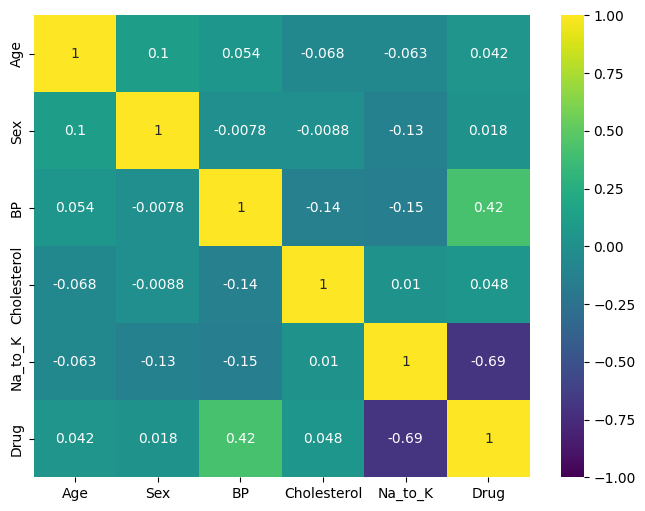

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr , vmin = -1 , vmax = 1 , cmap = "viridis" , annot=True)

# **checking for outliers**

<Axes: >

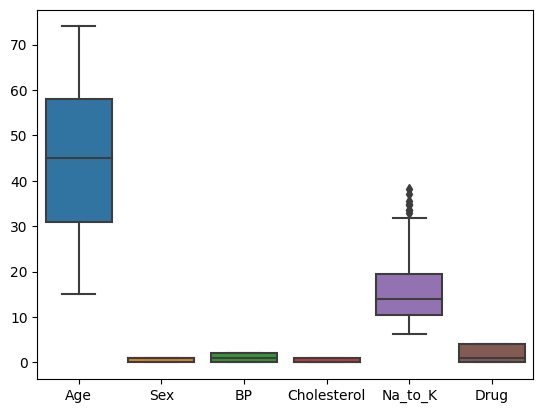

In [13]:
sns.boxplot(df)

<Axes: >

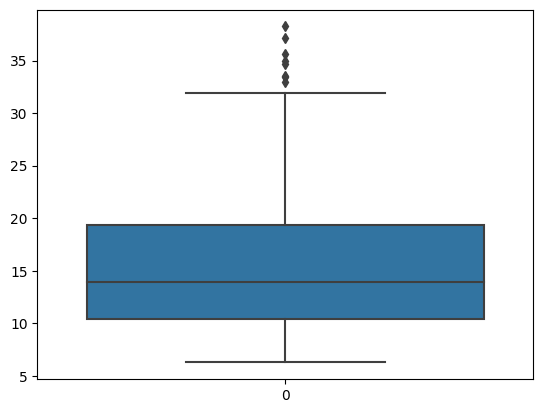

In [14]:
sns.boxplot(df["Na_to_K"])

In [15]:
def winsorize(df, column_name, lower_percentile=0.05, upper_percentile=0.95):
    
    x = df[column_name]
    
    lower_bound = x.quantile(lower_percentile)
    upper_bound = x.quantile(upper_percentile)
    
    
    winsorized_values = np.clip(x, lower_bound, upper_bound)
    
    df_winsorized = df.copy()
    df_winsorized[column_name] = winsorized_values
    
    return df_winsorized

In [16]:
df_cleaned = winsorize(df , "Na_to_K")

<Axes: >

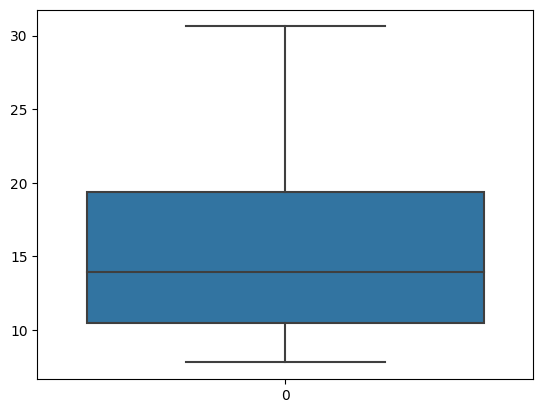

In [17]:
sns.boxplot(df_cleaned["Na_to_K"])

### **dealing with imbalanced data using oversampling**

In [18]:
num0 = (df_cleaned["Drug"] == 0).sum()
num1 = (df_cleaned["Drug"] == 1).sum()
num2 = (df_cleaned["Drug"] == 2).sum()
num3 = (df_cleaned["Drug"] == 3).sum()
num4 = (df_cleaned["Drug"] == 4).sum()

print("number of class 0" ,num0)
print("number of class 1" ,num1)
print("number of class 2" ,num2)
print("number of class 3" ,num3)
print("number of class 4" ,num4)

number of class 0 91
number of class 1 23
number of class 2 16
number of class 3 16
number of class 4 54


In [19]:
x = df_cleaned.drop("Drug" , axis = 1)
y = df_cleaned["Drug"]

In [20]:
smote = SMOTE(random_state=42)

x_resampled , y_resampled = smote.fit_resample(x,y)

In [21]:
num0 = (y_resampled == 0).sum()
num1 = (y_resampled == 1).sum()
num2 = (y_resampled == 2).sum()
num3 = (y_resampled == 3).sum()
num4 = (y_resampled == 4).sum()

print("number of class 0" ,num0)
print("number of class 1" ,num1)
print("number of class 2" ,num2)
print("number of class 3" ,num3)
print("number of class 4" ,num4)

number of class 0 91
number of class 1 91
number of class 2 91
number of class 3 91
number of class 4 91


In [22]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled,y_resampled , test_size=0.25 , random_state=42)

In [23]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
print(x_train_scaled.shape , x_test_scaled.shape , y_train.shape , y_test.shape)

(341, 5) (114, 5) (341,) (114,)


# **training phase**

### **Logistic Regression**

In [25]:
lr = LogisticRegression(max_iter= 2000 , random_state=42)
lr.fit(x_train_scaled , y_train)
y_pred = lr.predict(x_test_scaled)

accuracy = accuracy_score(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
class_report = classification_report(y_test , y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.9473684210526315
[[22  1  1  0  1]
 [ 0 22  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 21  0]
 [ 1  0  0  2 20]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.96      1.00      0.98        22
           2       0.96      1.00      0.98        23
           3       0.91      1.00      0.95        21
           4       0.95      0.87      0.91        23

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### **KNN**

In [26]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train_scaled , y_train)
y_pred = knn.predict(x_test_scaled)

accuracy = accuracy_score(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
class_report = classification_report(y_test , y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.956140350877193
[[21  0  1  1  2]
 [ 0 22  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  1 22]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       1.00      1.00      1.00        22
           2       0.96      1.00      0.98        23
           3       0.91      1.00      0.95        21
           4       0.92      0.96      0.94        23

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### **XGBoost**

In [27]:
xg = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)
xg.fit(x_train_scaled , y_train)
y_pred = xg.predict(x_test_scaled)

accuracy = accuracy_score(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
class_report = classification_report(y_test , y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.9473684210526315
[[24  0  0  0  1]
 [ 0 22  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 18  3]
 [ 0  0  0  2 21]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        23
           3       0.90      0.86      0.88        21
           4       0.84      0.91      0.87        23

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### **Decision Tree**

In [28]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(x_train_scaled, y_train)

y_pred = decision_tree.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9736842105263158
[[25  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  2 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        23
           3       0.91      0.95      0.93        21
           4       0.95      0.91      0.93        23

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **Random Forest**

In [29]:
random_forest = RandomForestClassifier(max_features= 8 , max_depth=6 , random_state= 42)

random_forest.fit(x_train_scaled, y_train)

y_pred = random_forest.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.9824561403508771
[[25  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  2 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        23
           3       0.91      1.00      0.95        21
           4       1.00      0.91      0.95        23

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Random Forest is the best accuracy**

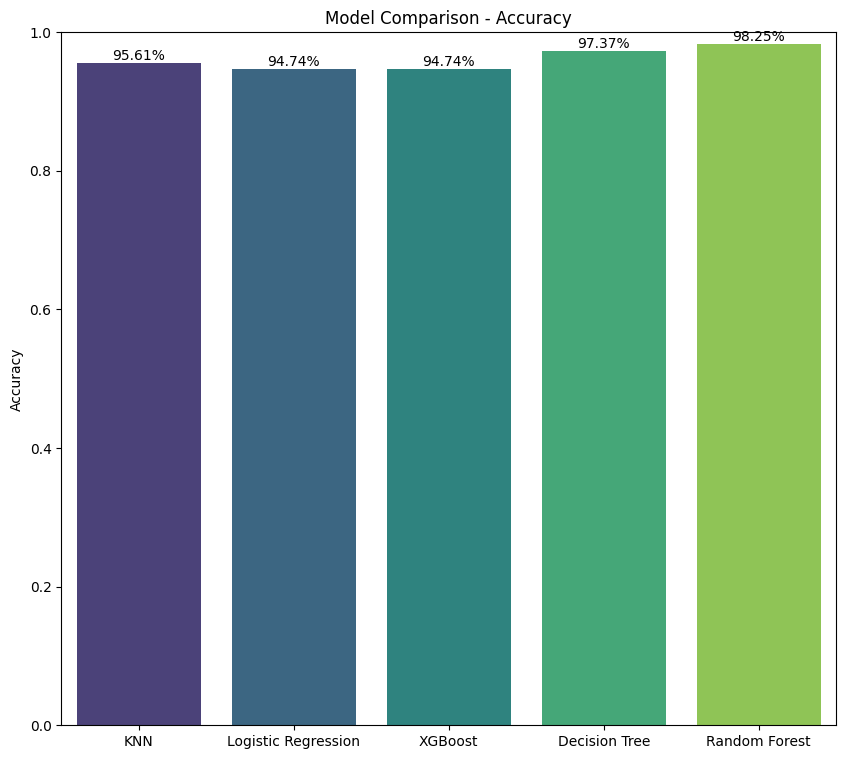

In [30]:
models = [knn, lr, xg, decision_tree, random_forest]
model_names = ['KNN', 'Logistic Regression', 'XGBoost', 'Decision Tree', 'Random Forest']
accuracies = []

for current_model in models:
    current_model.fit(x_train_scaled, y_train)
    y_pred = current_model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

total_models = len(models)
percentage_accuracies = [round(acc * 100, 2) for acc in accuracies]

plt.figure(figsize=(10, 9))
bars = sns.barplot(x=model_names, y=accuracies, palette="viridis")

for bar, percentage in zip(bars.patches, percentage_accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage}%', ha='center', va='bottom')

plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()